In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA

In [2]:
breast_cancer= load_breast_cancer()
X = breast_cancer.data
y = breast_cancer.target

In [3]:
Scaler = StandardScaler()
X_Scaled = Scaler.fit_transform(X)

In [4]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_Scaled)

In [5]:
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df['target'] = y

In [6]:
pca_df

,PC1,PC2,target
0,9.192837,1.948583,0
1,2.387802,-3.768172,0
2,5.733896,-1.075174,0
3,7.122953,10.275589,0
4,3.935302,-1.948072,0
...,...,...,...
564,6.439315,-3.576817,0
565,3.793382,-3.584048,0
566,1.256179,-1.902297,0
567,10.374794,1.672010,0


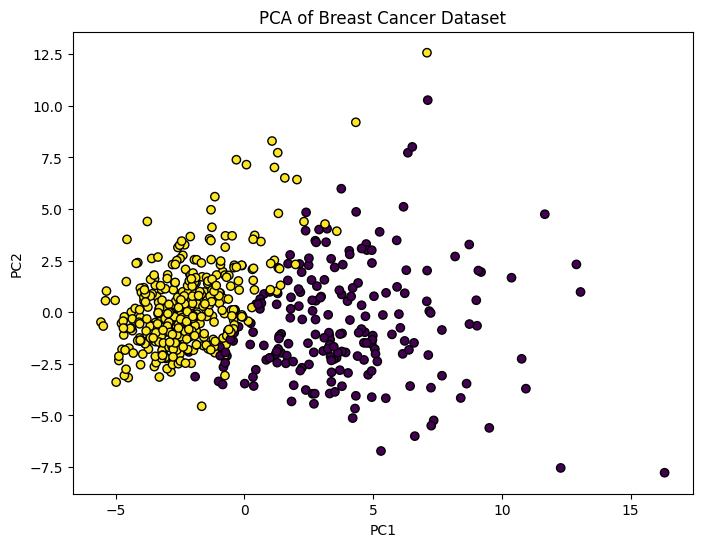

In [7]:
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'],pca_df['PC2'],c=pca_df['target'],cmap='viridis',edgecolor='k')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA of Breast Cancer Dataset')
plt.show()

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)


In [9]:
lr=LogisticRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9912280701754386

# Applying TSNE


In [21]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE

In [23]:
breast_cancer= load_breast_cancer()
X = breast_cancer.data
y = breast_cancer.target

In [24]:
Scaler = StandardScaler()
X_Scaled = Scaler.fit_transform(X)

In [25]:
TSNE = TSNE(n_components=2,random_state =42)
X_tsne = TSNE.fit_transform(X_Scaled)

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_tsne, y, test_size=0.2, random_state=42)


In [27]:
lg=LogisticRegression()
lg.fit(X_train,y_train)
y_pred=lg.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.956140350877193

In [32]:
def predict_breast_cancer(a1, a2, a3, a4, a5, a6, a7, a8, a9, a10):
    global scaler # Make scaler accessible inside the function
    # Initialize scaler if not already initialized to prevent re-fitting:
    if 'scaler' not in globals() or scaler is None:
        scaler = StandardScaler()
        scaler.fit(X_train)  # Fit scaler to the training data (X_tsne)

    input_data = scaler.transform([[a1, a2, a3, a4, a5, a6, a7, a8, a9, a10]])
    input_tsne = tsne.fit_transform(input_data)
    prediction = lg.predict(input_tsne)
    return breast_cancer.target_names[prediction[0]]


In [42]:
data = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]  # Replace with your actual data
prediction = predict_breast_cancer(*data)  # Unpack 'data' using the asterisk (*)
print(prediction)

None


SVD

In [46]:
import numpy as np
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import pandas as pd
from sklearn.metrics import accuracy_score

In [47]:
breast_cancer= load_breast_cancer()
X = breast_cancer.data
y = breast_cancer.target

In [48]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [49]:
svd = TruncatedSVD(n_components=2)
X_svd = svd.fit_transform(X_scaled)

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X_svd, y, test_size=0.2, random_state=42)

In [51]:
lgs=LogisticRegression()
lgs.fit(X_train,y_train)
y_pred=lgs.predict(X_test)
accuracy_score(y_test,y_pred)

0.9912280701754386

In [65]:
def predict_breast_cancer(a1, a2, a3, a4, a5, a6, a7, a8, a9, a10, a11, a12, a13, a14, a15, a16, a17, a18, a19, a20, a21, a22, a23, a24, a25, a26, a27, a28, a29, a30):
    input_data = [[a1, a2, a3, a4, a5, a6, a7, a8, a9, a10, a11, a12, a13, a14, a15, a16, a17, a18, a19, a20, a21, a22, a23, a24, a25, a26, a27, a28, a29, a30]]
    input_data_scaled = scaler.transform(input_data)
    input_data_svd = svd.transform(input_data_scaled)
    prediction = lgs.predict(input_data_svd)
    return breast_cancer.target_names[prediction[0]]

In [66]:
data = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11 , 12, 13, 14, 15, 16, 17, 18, 19, 20, 2, 22, 23, 24, 25, 26, 27, 28, 29, 30]  # Replace with your actual data
prediction = predict_breast_cancer(*data)  # Unpack 'data' using the asterisk (*)
print(prediction)

benign
